In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [252]:
df=pd.read_csv('/content/Housing.csv')


In [253]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [254]:
df.shape

(545, 13)

In [255]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [257]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


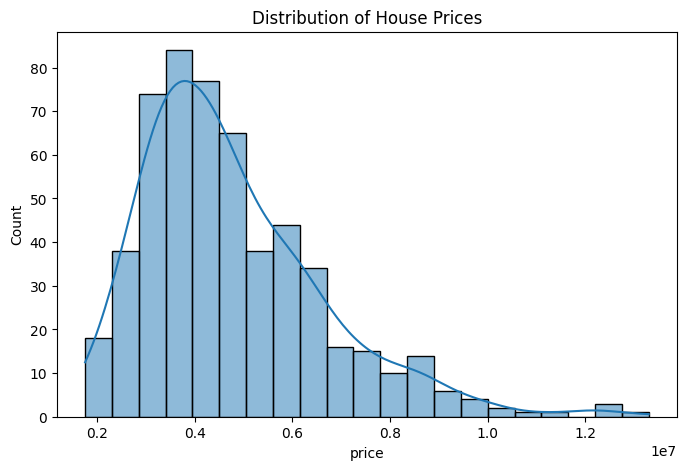

In [258]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True)
plt.title("Distribution of House Prices")
plt.show()

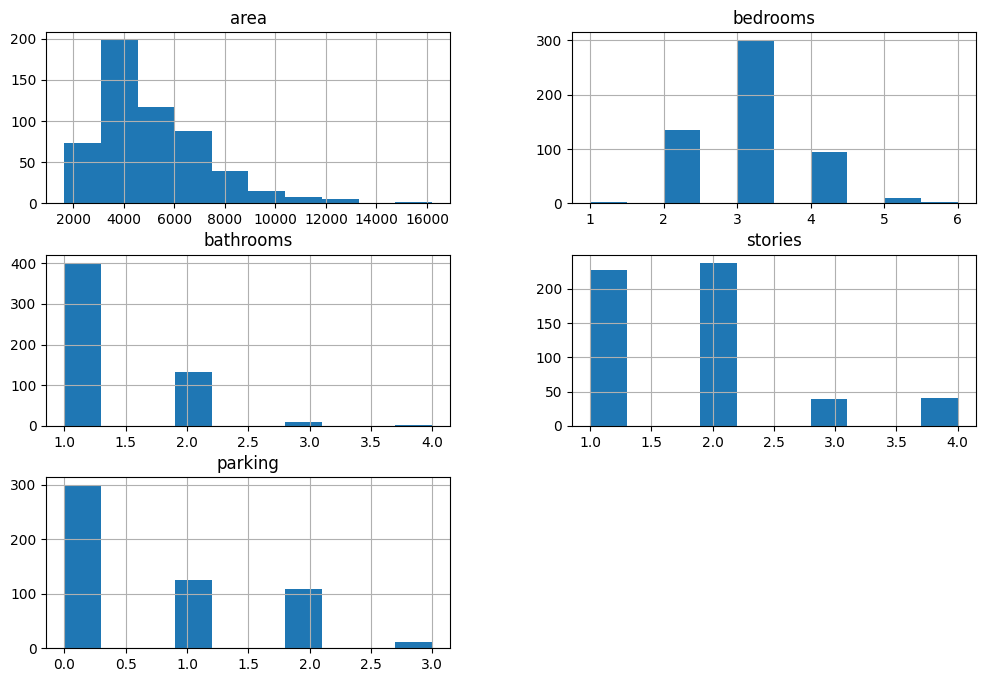

In [259]:
num_cols = ['area','bedrooms','bathrooms','stories','parking']

df[num_cols].hist(figsize=(12,8))
plt.show()



# House area is positively skewed, with most properties in the mid-size range.A few large houses represent premium properties and contribute to skewness.

# The dataset mostly contains 2–3 bedroom houses, indicating standard residential properties rather than luxury mansions.

# Bathrooms show limited variation but are more indicative of house value than bedrooms.

# Most houses are single or double-story, which reflects typical urban housing patterns.

# Parking availability is limited and acts as a differentiating factor that increases house prices.

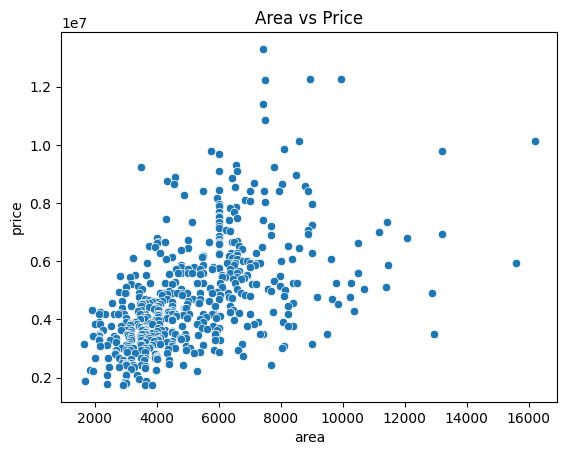

In [260]:
sns.scatterplot(x=df['area'], y=df['price'])
plt.title("Area vs Price")
plt.show()

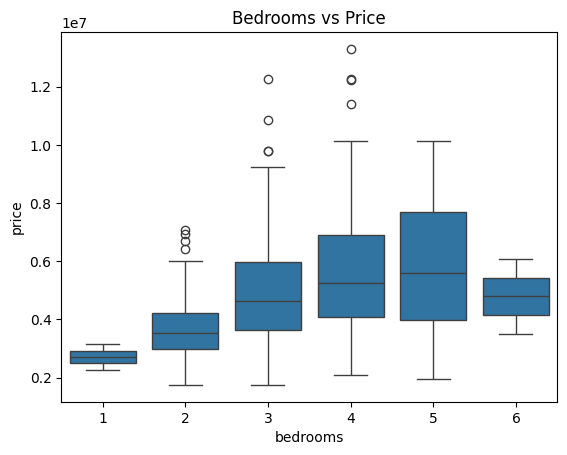

In [261]:
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.title("Bedrooms vs Price")
plt.show()


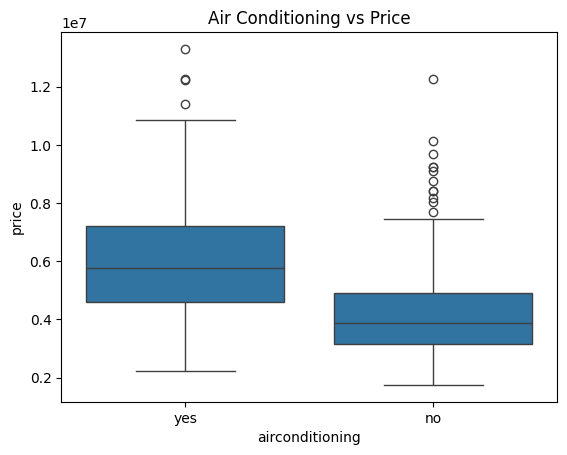

In [262]:
sns.boxplot(x=df['airconditioning'], y=df['price'])
plt.title("Air Conditioning vs Price")
plt.show()


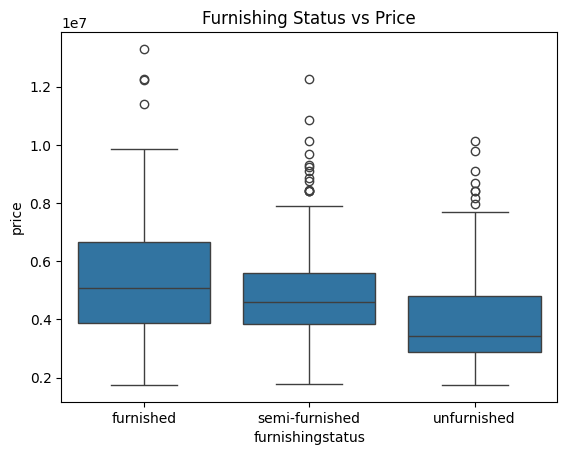

In [263]:
sns.boxplot(x=df['furnishingstatus'], y=df['price'])
plt.title("Furnishing Status vs Price")
plt.show()

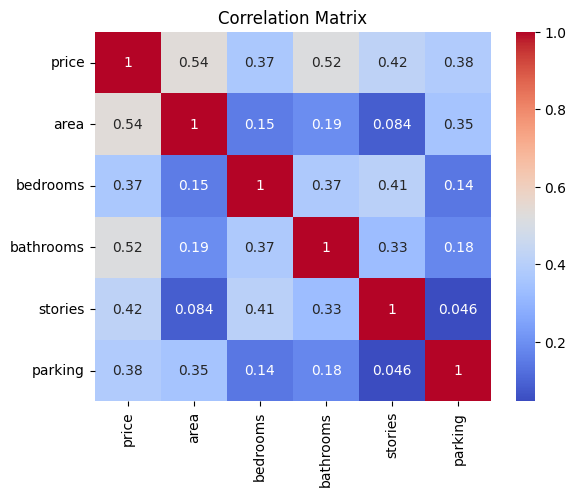

In [264]:
corr = df[['price','area','bedrooms','bathrooms','stories','parking']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [265]:
binary_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [266]:
df.loc[df['furnishingstatus']=='furnished',['furnishingstatus']]=2
df.loc[df['furnishingstatus']=='unfurnished',['furnishingstatus']]=0
df.loc[df['furnishingstatus']=='semi-furnished',['furnishingstatus']]=1
df['furnishingstatus'] = df['furnishingstatus'].astype(int)

In [267]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [268]:
df['log_price'] = np.log(df['price'])
df['log_area'] = np.log(df['area'])

In [269]:
df.drop(columns=['price','area'], inplace=True)

In [270]:
df.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price,log_area
0,4,2,3,1,0,0,0,1,2,1,2,16.403275,8.911934
1,4,4,4,1,0,0,0,1,3,0,2,16.321036,9.100526
2,3,2,2,1,0,1,0,0,2,1,1,16.321036,9.206332
3,4,2,2,1,0,1,0,1,3,1,2,16.318175,8.922658
4,4,1,2,1,1,1,0,1,2,0,2,16.250001,8.911934


In [271]:
y = df ['log_price']
x = df. drop( ['log_price'] , axis=1)

In [272]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [273]:
print("Linear Regression Metrics:")
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)

Linear Regression Metrics:
RMSE: 0.2549188293513116
R-squared: 0.6634520895613358


In [274]:
from sklearn.linear_model import Ridge

In [275]:
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

In [276]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr = r2_score(y_test, y_pred)

In [277]:
print("Ridge Regression Metrics:")
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)

Ridge Regression Metrics:
RMSE: 0.25507048063075566
R-squared: 0.6630515455718735


In [278]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror',
                                      colsample_bytree=0.3,
                                      learning_rate=.1,
                                      max_depth=10,

                                      n_estimators=100)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

rmse= np.sqrt (mean_squared_error(y_test, y_pred))

test_r2  = r2_score(y_test, y_pred)

In [279]:
print("XGBoost Metrics:")
print("RMSE:", rmse)
print("R-squared:", test_r2)

XGBoost Metrics:
RMSE: 0.2568800337440899
R-squared: 0.6582537428536184


In [280]:
print(rmse)

0.2568800337440899


In [281]:

# Define the hyperparameter grid
param_grid = {
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
  'learning_rate'   : [0.001, 0.01, 0.1, 1],
  'max_depth'       : [3, 5, 8, 10],
  'alpha'           : [1, 10, 100],
  'n_estimators'    : [10,50,100]
}



In [282]:
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [1, 10, 100],
                         'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 5, 8, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [283]:


print("Best Parameters:")
print(grid_search.best_params_)


Best Parameters:
{'alpha': 1, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [284]:
model = xgb.XGBRegressor(objective='reg:squarederror',
                                      colsample_bytree=0.3,
                                      learning_rate=.1,
                                      max_depth=3,
                                      alpha=1,
                                      n_estimators=100)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

rmse= np.sqrt (mean_squared_error(y_test, y_pred))

test_r2  = r2_score(y_test, y_pred)

In [285]:
print("XGBoost Metrics after tuning:")
print("RMSE:", rmse)
print("R-squared:", test_r2)

XGBoost Metrics after tuning:
RMSE: 0.25283497984358694
R-squared: 0.6689318630826353
